<a href="https://colab.research.google.com/github/gitblankhub/Baf/blob/main/%EA%B8%B0%ED%9B%84%EA%B8%B0%EC%88%A0%EB%B6%84%EB%A5%98/trials/%EA%B8%B0%ED%9B%84%EB%B6%84%EB%A5%98_0114_BERT(%EA%B3%BC%EC%A0%9C%EB%AA%85%EB%A7%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기후기술 분석

train.csv :
- train 데이터
- 기후기술분류 label 포함
- train.shape: (174304, 13)

test.csv :
- test 데이터
- 기후기술분류 label 미포함
- test.shape: (43576, 12)




sample_submission.csv :
- sample_submission 데이터
- sample_submission.shape: (43576, 2)


labels_mapping.csv :
- label과 기후기술분류체계를 mapping 한 meta data






In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,092 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.2"


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [ ]:
#파일 읽기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rc('font', family='NanumBarunGothic') #한글 깨짐


train=pd.read_csv('/content/drive/MyDrive/open/train.csv')
test=pd.read_csv('/content/drive/MyDrive/open/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/open/sample_submission.csv')
label=pd.read_csv('/content/drive/MyDrive/open/labels_mapping.csv')


In [ ]:
import re #정규화 표현식

## exploration

### train data

- train 데이터
- 기후기술분류 label 포함
- train.shape: (174304, 13)

In [ ]:
train.shape

(174304, 13)

In [ ]:
train.head()

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0
2,2,2016,중소기업기술혁신개발,중소기업청,신규,혁신기업기술개발,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n* 소비자 및 바...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,* 국내 독자적인 비목질계 셀룰로오스 자원의 파이버 및 부직포 제조 등의 기술 확보...,"기능성 샐룰로오스 파이버,천연섬유,기능성 부직포,뷰티&amp;케어 제품,미용 솜","functional cellulose fiber,natural fiber,funct...",0
3,3,2018,창업성장기술개발(R&D),중소벤처기업부,신규,창업사업화연계과제,소화기 암 진단용 분자영상 형광프로브 개발,# 암특이적 바이오마커 발굴 및 바이오마커에 대한 프로브 개발\n\n\n1) 소화...,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,# 암 진단기술의 차별성: 소화기 암 특이 프로브 개발\n\n\n- 최근 체외진단시...,"분자 진단,형광 조영제,프로브,항체,대장암","Molecular diagnosis,Fluorescence,probe,antibod...",0
4,4,2016,이공학개인기초연구지원,교육부,계속,기본연구지원,위암환자의 항암제반응예측을 위한 BRCA 발현검사,"수술이 불가능한 위암환자는 생존기간은 10개월 안팎에 지나지 않고, 항암화학요법에 ...",-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,-본 연구는 파라핀보관조직에서 in situ hybridization로 mRNA 및...,"BRCA,제자리부합법,조직미세배열,마이크로RNA,위암,항암제반응,젊은 연령/가족성 위암","BRCA,Insituhybridization,tissuemicroarray,micr...",0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174304 entries, 0 to 174303
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      174304 non-null  int64 
 1   제출년도       174304 non-null  int64 
 2   사업명        174304 non-null  object
 3   사업_부처명     174304 non-null  object
 4   계속과제여부     174304 non-null  object
 5   내역사업명      174304 non-null  object
 6   과제명        174304 non-null  object
 7   요약문_연구목표   171302 non-null  object
 8   요약문_연구내용   171303 non-null  object
 9   요약문_기대효과   171253 non-null  object
 10  요약문_한글키워드  171276 non-null  object
 11  요약문_영문키워드  171217 non-null  object
 12  label      174304 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 17.3+ MB


In [ ]:
train.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

### test data

- test 데이터
- 기후기술분류 label 미포함
- test.shape: (43576, 12)

In [ ]:
test.shape

(43576, 12)

In [ ]:
test.head()

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
0,174304,2016,경제협력권산업육성,산업통상자원부,신규,자동차융합부품,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 차체 점용접부의 품질 검사를 위한 64채널 무선 기반 C-Scan 탐촉자 개발\...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...,○ 기술적 파급효과\n\n - 본 연구에서 개발된 R-FSSW 접합 기술은 기존 ...,"마찰교반점용접, 비파괴 검사, 초음파 탐상, 씨 스캔, 용접 품질 평가","Friction Stir Spot Welding, Non-destructive ev..."
1,174305,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,신진연구(총연구비5천이상~1.5억이하),다입자계를 묘사하는 편미분방정식에 대한 연구,자연계에는 입자의 개수가 아주 큰 다양한 다입자계가 존재한다. 이런 다입자계의 효...,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...,본 연구는 물리학에서 중요한 대상인 다입자계를 묘사하는 모델방정식의 정당성을 보장하...,"다체계 방정식,동역학의 안정성,양자역학,고전역학,평균장 극한,고전극한,비상대론적 극한","many particle system,stability of dynamics,qua..."
2,174306,2017,개인기초연구(미래부),과학기술정보통신부,계속,자유공모,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발,"저출생체중아는 정상 체중 출생아에 비하여 운동, 정신, 행동 및 정서발달장애가 빈번...",본 연구는 퇴원 후 저출생체중아의 퇴원 후 추후관리 프로그램 중 가정방문 모델과 가...,본 연구는 저출생체중아 가족 대상의 지역사회기반의 추후관리 사업에 대한 구체적인 모...,"저출생체중아,추후관리,조기개입,자조모임,가정방문","lowbirthweightinfant,followup,earlyinterventio..."
3,174307,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,전략 협력(지역유망),폴리싱용 5축 CNC 정밀 마이크로 시스템 개발,최근 초정밀 공작기계 시장의 트렌드를 살펴보면 다음과 같다.\n\n\n(1) 자동차...,(1) 0.5~1㎛의 가공정밀도(면조도) 구현\n\n\n - 국내에서는 연삭기를 제...,(1) 가공 공정 및 소요시간 단축\n\n\n 초정밀금형 가공시 정삭 후 추가적...,"초정밀가공,폴리싱 가공,마이크로,경면가공,난삭재가공","superprecision,hiprecision,micro,mirror like f..."
4,174308,2019,이공학학술연구기반구축(R&D),교육부,계속,지역대학우수과학자지원사업(1년~5년),다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발,본 연구의 최종목표는 다결정 금속재료의 미세조직구조를 고려한 확률론적 응력부식균열(...,"총 연구기간은 3년으로, 연차별 연구내용 및 범위는 다음과 같다.\n\n ∙ 1차...",본 연구의 중요성 및 활용가능성은 다음과 같다.\n\n ∙ 기존의 재료전체 ave...,"결정구조,응력부식균열,확률론적모델","Crystalline structure,Stress corrosion crackin..."


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43576 entries, 0 to 43575
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      43576 non-null  int64 
 1   제출년도       43576 non-null  int64 
 2   사업명        43576 non-null  object
 3   사업_부처명     43576 non-null  object
 4   계속과제여부     43576 non-null  object
 5   내역사업명      43576 non-null  object
 6   과제명        43576 non-null  object
 7   요약문_연구목표   42821 non-null  object
 8   요약문_연구내용   42821 non-null  object
 9   요약문_기대효과   42815 non-null  object
 10  요약문_한글키워드  42816 non-null  object
 11  요약문_영문키워드  42804 non-null  object
dtypes: int64(2), object(10)
memory usage: 4.0+ MB


In [ ]:
test.isna().sum()

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64

### submission

In [ ]:
sample.head()

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0


### label

In [ ]:
label

,label,소분류
0,0,00. NaN
1,1,01. 원자력 발전
2,2,02. 핵융합 발전
3,3,03. 청정화력발전·효율화
4,4,04. 수력
5,5,05. 태양광
6,6,06. 태양열
7,7,07. 지열
8,8,08. 풍력
9,9,09. 해양에너지


## EDA

### 결측치(train & test)

In [ ]:
train.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

In [ ]:
train[train['요약문_기대효과'].isna()]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
34,34,2019,과학기술연합대학원대학교연구운영비지원(R&D)(운영경비),과학기술정보통신부,계속,과학기술연합대학원대학교연구운영비지원,과학기술연합대학원대학교 운영비,NaN,NaN,NaN,NaN,NaN,0
108,108,2017,한국과학기술원연구운영비지원(0.5),과학기술정보통신부,계속,글로벌교육연구선도사업,미래형융합교육프로그램운영,NaN,NaN,NaN,NaN,NaN,0
205,205,2017,지방대학육성사업(0.5),교육부,계속,지방대학 특성화사업,환경친화형 융복합 기계부품 창의 인재 양성 사업단,NaN,NaN,NaN,NaN,NaN,0
321,321,2019,국가과학기술연구회연구운영비지원(R&D)(주요사업비),과학기술정보통신부,계속,출연(연)지원육성사업,출연(연) 지원육성사업,NaN,NaN,NaN,NaN,NaN,0
328,328,2018,국민안전증진기술개발(R&D),산업통상자원부,계속,사회문제해결형 다부처공동사업,2017 사회문제해결형R&D 다부처 공동시범사업(평가관리),NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174139,174139,2016,소재부품산업기술개발기반구축,산업통상자원부,계속,기획평가관리비,소재부품산업기술개발기반구축 평가관리비,NaN,NaN,NaN,NaN,NaN,0
174173,174173,2017,미래해양자원기술개발,해양수산부,계속,기획평가관리비,미래해양자원기술개발 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174174,174174,2017,포스트게놈신산업육성을위한다부처유전체사업(농림부),농림축산식품부,계속,기획평가관리비,포스트게놈다부처유전체사업(농림부) 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174230,174230,2018,한국과학기술원한국과학영재학교지원(R&D),과학기술정보통신부,계속,한국과학기술원한국과학영재학교지원,한국과학기술원 한국과학영재학교 운영비,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
test.isna().sum()

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64

### column 별



In [ ]:
train['label'].value_counts(sort=False)

0     142571
1       1261
2        275
3        143
4         57
5       1698
6         78
7        113
8        339
9        106
10       658
11       200
12       268
13       575
14      1672
15       165
16       506
17       154
18      1550
19      4938
20      1059
21       496
22       148
23      1840
24      3520
25       810
26       316
27       620
28       449
29      1028
30       234
31       922
32       260
33       533
34       523
35       291
36      1060
37       266
38       262
39       202
40       441
41        67
42        51
43       351
44        91
45      1137
Name: label, dtype: int64

In [ ]:
train['label'].value_counts(sort=False) / len(train)

0     0.817945
1     0.007234
2     0.001578
3     0.000820
4     0.000327
5     0.009742
6     0.000447
7     0.000648
8     0.001945
9     0.000608
10    0.003775
11    0.001147
12    0.001538
13    0.003299
14    0.009592
15    0.000947
16    0.002903
17    0.000884
18    0.008893
19    0.028330
20    0.006076
21    0.002846
22    0.000849
23    0.010556
24    0.020195
25    0.004647
26    0.001813
27    0.003557
28    0.002576
29    0.005898
30    0.001342
31    0.005290
32    0.001492
33    0.003058
34    0.003001
35    0.001669
36    0.006081
37    0.001526
38    0.001503
39    0.001159
40    0.002530
41    0.000384
42    0.000293
43    0.002014
44    0.000522
45    0.006523
Name: label, dtype: float64

(array([45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.92592253e-04, 8.20577841e-02, 1.63822976e-01, 2.45588168e-01,
        3.27353360e-01, 4.09118551e-01, 4.90883743e-01, 5.72648935e-01,
        6.54414127e-01, 7.36179319e-01, 8.17944511e-01]),
 <a list of 10 Patch objects>)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


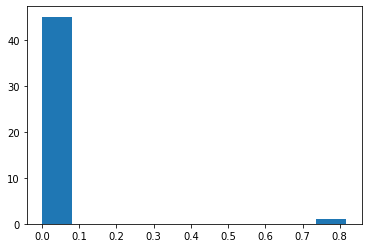

In [ ]:
plt.hist(train['label'].value_counts(sort=False) / len(train))

#0번 label = nan 데이터가 많음

In [ ]:
train['제출년도'].value_counts(sort=False)

2016    37685
2017    42766
2018    45018
2019    48835
Name: 제출년도, dtype: int64

In [ ]:
train['사업명'].value_counts(sort=False)

혁신신약파이프라인발굴(R&D)             24
한국건설기술연구원연구운영비지원(운영경비)        1
시스템산업미래성장동력                  36
공정·품질기술개발                   667
울산과학기술원연구운영비지원(주요사업비)        10
                           ... 
초소형전기차산업및서비스육성실증지원(R&D)       6
한국생명공학연구원첨단의료유전체연구원지원         1
국가도서관지식콘텐츠의창조적관리및확산(R&D)      1
에너지자원순환기술개발                  47
식품등안전관리(R&D)                341
Name: 사업명, Length: 1414, dtype: int64

In [ ]:
train['사업_부처명'].value_counts(sort=True)

과학기술정보통신부    42455
교육부          34336
중소벤처기업부      23364
산업통상자원부      15127
농촌진흥청        14715
미래창조과학부      10230
보건복지부         7522
중소기업청         5938
농림축산식품부       5879
해양수산부         3371
환경부           2324
국토교통부         2056
식품의약품안전처      1911
다부처           1429
산림청           1044
기상청            586
문화체육관광부        455
원자력안전위원회       402
행정안전부          321
범부처 사업         212
국민안전처          141
소방청            138
경찰청             95
해양경찰청           92
문화재청            81
특허청             38
행정자치부           35
기획재정부            7
Name: 사업_부처명, dtype: int64

In [ ]:
train['과제명'].value_counts(sort=False)

장수형 밀 이삭길이 및 농업형질 관련 유전자 기능 검정                          2
우유 마이크로RNA 유전체를 활용한 골다공증 예방 기능성 유전소재 개발                 1
정형/비정형 서베이 및 SNS평판분석을 위한 빅데이터기반의 자동화된 여론분석 서베이 시스템      2
4차산업을 위한 대용량 스마트 무선충전장치 개발                              2
삼채의 생리활성 및 작용기전 구명                                      1
                                                       ..
토양 중 불소 전함량 평가를 위한 X선 형광분석용 표준시편 개발 및 실용화 연구            1
자문과 판매를 결합한 One Stop 인공지능 투자자문 클라우드 컴퓨팅(SaaS) 서비스 개발    1
작물생육상태에 따른 지능형 토경온실 환경제어시스템 기술 개발                       1
노화에 따른 연하기능 변화에서 고주파 반복적 경두개 자기자극 후 대뇌피질의 활동성 변화        1
두부 첨가로 풍미와 식감을 개량한 고추장 개발                               1
Name: 과제명, Length: 106623, dtype: int64

##### 과제명

In [ ]:
train['과제명']

0                              유전정보를 활용한 새로운 해충 분류군 동정기술 개발
1         대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...
2         비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...
3                                   소화기 암 진단용 분자영상 형광프로브 개발
4                               위암환자의 항암제반응예측을 위한 BRCA 발현검사
                                ...                        
174299                             혈관내막 증식을 치료하기 위한 표적분자 발굴
174300    삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...
174301                        식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구
174302                     콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발
174303               광학적 위상 제어 기법을 적용한 디지털 홀로그래피 현미경 시스템 개발
Name: 과제명, Length: 174304, dtype: object

In [ ]:
type(train['과제명'])

pandas.core.series.Series

In [ ]:
train['과제명'].astype(str)

0                              유전정보를 활용한 새로운 해충 분류군 동정기술 개발
1         대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...
2         비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...
3                                   소화기 암 진단용 분자영상 형광프로브 개발
4                               위암환자의 항암제반응예측을 위한 BRCA 발현검사
                                ...                        
174299                             혈관내막 증식을 치료하기 위한 표적분자 발굴
174300    삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...
174301                        식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구
174302                     콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발
174303               광학적 위상 제어 기법을 적용한 디지털 홀로그래피 현미경 시스템 개발
Name: 과제명, Length: 174304, dtype: object

In [ ]:
len(train['과제명'].astype(str))

174304

In [ ]:
train['과제명'].astype(str).apply(len)

0         28
1         53
2         71
3         23
4         27
          ..
174299    24
174300    51
174301    29
174302    32
174303    38
Name: 과제명, Length: 174304, dtype: int64

과제명 length 최대값 :  229
과제명 length 최소값 :  2


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


과제명 length 평균값 :  35.84252225995961
과제명 length 중간값 :  34.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text

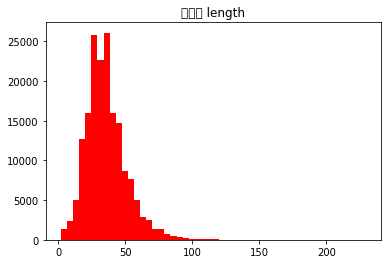

In [ ]:
plt.hist(train['과제명'].astype(str).apply(len),bins=50,color='red')
plt.title("과제명 length")
print("과제명 length 최대값 : ",max(train['과제명'].astype(str).apply(len)))
print("과제명 length 최소값 : ",min(train['과제명'].astype(str).apply(len)))
print("과제명 length 평균값 : ",train['과제명'].astype(str).apply(len).mean())
print("과제명 length 중간값 : ",train['과제명'].astype(str).apply(len).median())


{'boxes': [<matplotlib.lines.Line2D at 0x7f78284953d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f782849c450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f78284a2490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f782849cf10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7828495990>,
  <matplotlib.lines.Line2D at 0x7f7828495ed0>]}

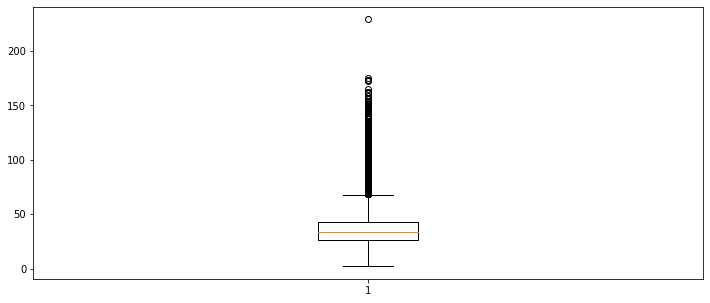

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot(train['과제명'].astype(str).apply(len))

In [ ]:
train01 = train[['과제명','label']]
train01.head(10)

,과제명,label
0,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,24
1,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,0
2,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,0
3,소화기 암 진단용 분자영상 형광프로브 개발,0
4,위암환자의 항암제반응예측을 위한 BRCA 발현검사,0
5,국제 핵융합 재료조사시설(IFMIF)의 안정적 운전을 위한 고강도 빔 물리 연구,2
6,마이크로시스를 적용한 옥내·외 겸용 광케이블 개발,0
7,임상·오믹스 정보 통합 개방형 플랫폼 구축 및 다기관 검증,0
8,IoT기반 수출배 선과장 물류체계화 기술개발,0
9,지역 창조경제 생태계 활성화를 위한 바이오산업 인재 양성,0


In [ ]:
test01=test['과제명']
test01.head(10)

0    R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...
1                             다입자계를 묘사하는 편미분방정식에 대한 연구
2                저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발
3                           폴리싱용 5축 CNC 정밀 마이크로 시스템 개발
4             다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발
5                          DC 그리드용 차세대 DC 전력차단기에 관한 연구
6                   현존선을 LNG연료추진선으로 Retrofit하기 위한 기술개발
7    전이 암세포의 점탄성 관련 keratin 재구축 조절 타겟들의 암 미세환경에서의 역...
8                                         국민안전 분석기술 개발
9             선택적 방사선 감응 기반 차세대 고성능 양이온 이차전지용 세퍼레이터 개발
Name: 과제명, dtype: object

### column 과제명 & 요약문_연구내용

과제명과 연구내용요약문을 합쳐서 새로운 열 'data'를 만든다

In [ ]:
train.isna().sum()
# train 요약문_연구내용에 na가 3001개

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

In [ ]:
test.isna().sum()
#test 요약문 na 755개

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64

In [ ]:
#과제명 & 요약문_연구내용
train1 = train[['과제명','요약문_연구내용','label']]
test1 = test[['과제명','요약문_연구내용']]

#요약문_연구내용 na 자리에 'NAN' 채우기
train1['요약문_연구내용'].fillna('NAN',inplace=True)
test1['요약문_연구내용'].fillna('NAN',inplace=True)

#'data' 열 만들기 = 과제명과 요약문 연구내용을 합침
train1['data']=train1['과제명']+train1['요약문_연구내용']
test1['data']=test1['과제명']+test1['요약문_연구내용']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
print(train1.shape)
print(test1.shape)

(174304, 4)
(43576, 3)


In [ ]:
train1.head()

,과제명,요약문_연구내용,label,data
0,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,24,유전정보를 활용한 새로운 해충 분류군 동정기술 개발(가) 외래 및 돌발해충의 발생조...
1,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,0,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...
2,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,0,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...
3,소화기 암 진단용 분자영상 형광프로브 개발,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,0,소화기 암 진단용 분자영상 형광프로브 개발# 소화기 암 진단용 분자영상 형광프로브 ...
4,위암환자의 항암제반응예측을 위한 BRCA 발현검사,-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,0,위암환자의 항암제반응예측을 위한 BRCA 발현검사-In situ hybridizat...


(array([4.2110e+03, 1.3441e+04, 1.7477e+04, 1.6763e+04, 1.6569e+04,
        1.6473e+04, 1.4956e+04, 1.3086e+04, 1.1130e+04, 9.3010e+03,
        7.7460e+03, 5.6640e+03, 5.0630e+03, 6.9280e+03, 3.1860e+03,
        2.5880e+03, 2.3880e+03, 2.2450e+03, 1.5490e+03, 9.0900e+02,
        8.8400e+02, 4.1500e+02, 3.2100e+02, 3.2300e+02, 2.7200e+02,
        1.9600e+02, 9.3000e+01, 4.7000e+01, 2.8000e+01, 2.7000e+01,
        4.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([   6.   ,  108.375,  210.75 ,  313.125,  415.5  ,  517.875,
         620.25 ,  722.625,  825.   ,  927.375, 1029.75 , 1132.125,
        1234.5  , 1336.875, 1439.25 , 1541.625, 1644.   , 1746.375,
        1848.75 , 1951.125, 2053.5  , 2155.875, 2258.25 , 2360.625,
        2463.   , 2565.375, 2667.75 , 2770.125, 2872.5  , 2974.875,
        3077.25 , 3179.625, 3282.   , 3384.375, 3486.75 , 3589.125,
        3691.5  , 3793.875, 3896.25 , 3998.625

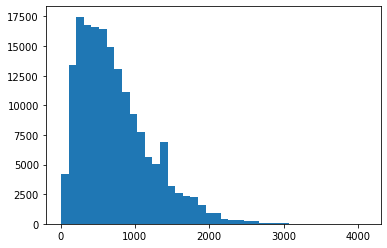

In [ ]:
plt.hist(train1['data'].astype(str).apply(len),bins=40)

In [ ]:
test1.head()

,과제명,요약문_연구내용,data
0,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...
1,다입자계를 묘사하는 편미분방정식에 대한 연구,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...,다입자계를 묘사하는 편미분방정식에 대한 연구연구과제1. 무한입자계의 동역학 / 작용...
2,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발,본 연구는 퇴원 후 저출생체중아의 퇴원 후 추후관리 프로그램 중 가정방문 모델과 가...,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발본 연구는 퇴원 ...
3,폴리싱용 5축 CNC 정밀 마이크로 시스템 개발,(1) 0.5~1㎛의 가공정밀도(면조도) 구현\n\n\n - 국내에서는 연삭기를 제...,폴리싱용 5축 CNC 정밀 마이크로 시스템 개발(1) 0.5~1㎛의 가공정밀도(면조...
4,다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발,"총 연구기간은 3년으로, 연차별 연구내용 및 범위는 다음과 같다.\n\n ∙ 1차...",다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발총 연구기간...


(array([1.032e+03, 2.856e+03, 3.990e+03, 4.018e+03, 4.004e+03, 3.849e+03,
        3.640e+03, 3.336e+03, 2.883e+03, 2.401e+03, 2.096e+03, 1.546e+03,
        1.299e+03, 1.212e+03, 1.559e+03, 6.700e+02, 6.180e+02, 5.900e+02,
        5.700e+02, 4.300e+02, 2.470e+02, 2.270e+02, 1.220e+02, 8.900e+01,
        8.800e+01, 6.800e+01, 4.500e+01, 3.800e+01, 1.700e+01, 1.100e+01,
        1.000e+01, 3.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([   6.  ,  102.35,  198.7 ,  295.05,  391.4 ,  487.75,  584.1 ,
         680.45,  776.8 ,  873.15,  969.5 , 1065.85, 1162.2 , 1258.55,
        1354.9 , 1451.25, 1547.6 , 1643.95, 1740.3 , 1836.65, 1933.  ,
        2029.35, 2125.7 , 2222.05, 2318.4 , 2414.75, 2511.1 , 2607.45,
        2703.8 , 2800.15, 2896.5 , 2992.85, 3089.2 , 3185.55, 3281.9 ,
        3378.25, 3474.6 , 3570.95, 3667.3 , 3763.65, 3860.  ]),
 <a list of 40 Patch objects>)

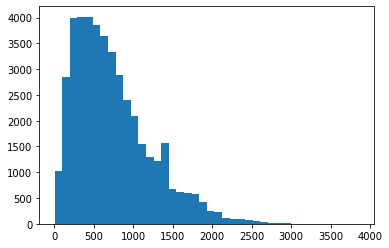

In [ ]:
plt.hist(test1['data'].astype(str).apply(len),bins=40)

In [ ]:
max(test1['data'].astype(str).apply(len)) #최대 길이

3860

## 모델링 (BERT)

https://han-py.tistory.com/267


### bert tokenizing

트랜스포머가 인코더-디코더 구조에서 LSTM 보다 좋은 성능

https://han-py.tistory.com/252


In [ ]:
"""
<WordPiece tokenizing.>
데이터를 전처리 이후에 tokenizing.
많이 나오는 단어수를 빈도수에 맞게 tokenizing으로 분류한다고 생각하면 된다.

1단계로 모든 단어마다 tokenizing을 진행한다.
2단계로는 빈도수가 많은 단어의 묶음을 반복하여 계속 확인을 한다.
그러면, 특정 반복을 통해 만들어진 vocab을 최종 vocab으로 저장을 한다.

"""

'\n<WordPiece tokenizing.>\n데이터를 전처리 이후에 tokenizing. \n많이 나오는 단어수를 빈도수에 맞게 tokenizing으로 분류한다고 생각하면 된다.\n\n1단계로 모든 단어마다 tokenizing을 진행한다. \n2단계로는 빈도수가 많은 단어의 묶음을 반복하여 계속 확인을 한다. \n그러면, 특정 반복을 통해 만들어진 vocab을 최종 vocab으로 저장을 한다.\n\n'

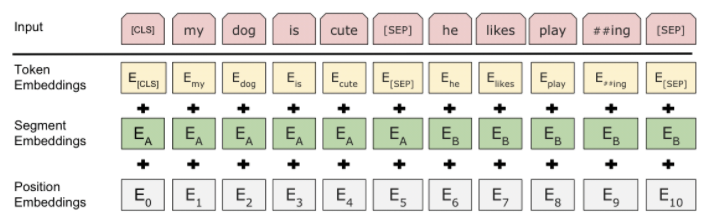

In [ ]:
! pip install transformers
! pip install sentencepiece

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 41.1 MB/s 
     |████████████████████████████████| 3.3 MB 35.2 MB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 5.4 MB/s 


https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/7.PRETRAIN_METHOD/7.2.1.bert_finetune_NSMC.ipynb



http://yonghee.io/bert_binary_classification_naver/






In [ ]:
import tensorflow as tf
import json
import os

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss , accuracy_score, f1_score

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from transformers import BertModel
from transformers import BertTokenizer


In [ ]:
#random seed 고정
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE = 32 # 한번에 넣을 데이터 양
NUM_EPOCHS = 3 # 순환 수
VALID_SPLIT = 0.2 #train set 0.8:0.2
MAX_LEN = 100 #EDA 에서 추출된 max length .. token들의 max length 보다 크게 설정

In [ ]:
#사전학습된 BERT multilingual 모델 내 포함된 토크나이저를 활용하여 토크나이징
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', #bert-base 토크나이저
                                          cache_dir='bert_ckpt',
                                           do_lower_case=False)



#bert tokenizer
#버트 문장 전처리
"""
 버트는 일반적으로 3가지 입력값: input_ids / attention_mask / token_type_ids
"""
def bert_tokenizer(sent, MAX_LEN):

    #encoded_dict 생성
    encoded_dict=tokenizer.encode_plus(
      #encode_plus: 버트에 필요한 입력 형태로 변환할 문장을 최대 길이에 맞게 패딩하고 결괏값을 딕셔너리로 출력
      text = sent, #문장을 토크나이징한다.
      add_special_tokens=True, # True로 지정하면 토큰의 시작점에 '[CLS]' 토큰, 토큰의 마지막에 '[SEP]' 토큰을 붙인다.
      max_length=MAX_LEN, #MAX_LEN 최대 길이에 따라 문장의 길이를 맞추는 작업을 진행
      pad_to_max_length=True, #padding . MAX_LEN의 길이에 미치지 못하는 문장에 패딩을 적용
      return_attention_mask=True, #어텐션 마스크를 생성
      truncation = True)
    """
    토큰 타입은 문장이 1개일 경우 0으로, 문장이 2개일 경우 0과 1로 구분해서 생성한다.
    문장이 바뀔 때 마다 0에서 1로 바뀐 후 다시 1에서 0으로 바뀐다.
    ex [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0] <= 3문장이라는 것을 알 수 있다.
    """


    #input_ids : 문장을 토크나이즈해서 인덱스 값으로 변환.
    #일반적으로 버트에서는 단어를 subword 단위로 변환 시키는 워드 피스 토크나이저로 활용을 한다.
    input_id=encoded_dict['input_ids']

    #어텐션 마스크 : 학습 속도를 높이기 위해 실 데이터가 있는 곳과 padding이 있는 곳을 알려준다.
    #버트 토크나이저에서는 1은 어텐션에 영향을 받는 토큰을 나타내고, 0은 영향을 받지 않는 토큰을 나타낸다.
    attention_mask=encoded_dict['attention_mask']

    #token_type_ids : 0과 1로 문장의 토큰 값을 분리한다.
    #[CLS]는 문장의 시작을 의미하고, [SEP]는 문장이 분리되는 부분을 의미하는 토큰이다.
    token_type_id = encoded_dict['token_type_ids']

    return input_id, attention_mask, token_type_id







input_ids =[]
attention_masks =[]
token_type_ids =[]
train_data_labels = [] #최종 행렬





#텍스트 처리
def clean_text(sent):
    sent_clean=re.sub("[^가-힣ㄱ-하-ㅣ]", " ", sent) #resub 한글 제외 전부 공백 처리
    return sent_clean




for train_sent, train_label in zip(train1['과제명'], train1['label']): ##!!과제명
    #train 의 과제명와 label 열
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(clean_text(train_sent), MAX_LEN=MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        #########################################
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass




#학습에 사용할 train 데이터들을 행렬 형태로
train_input_ids=np.array(input_ids, dtype=int)
train_attention_masks=np.array(attention_masks, dtype=int)
train_token_type_ids=np.array(token_type_ids, dtype=int)
###########################################################
train_inputs=(train_input_ids, train_attention_masks, train_token_type_ids) #행렬 합치기 (id mask tokentype)

train_labels=np.asarray(train_data_labels, dtype=np.int32)



Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print(train_input_ids[1])

[   101   9069  13890 119115  10459   8996  17138   9934  14801   9640
  13764   9323 118654   9316   9321 119187   9576 119281   9625  16617
  13764   9706  12092   8908  70122  10530  42300  91785    102      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0]


In [ ]:
print(tokenizer.decode(train_input_ids[1]))

[CLS] 대장암의 내성 표적 인자 발굴 및 반응 예측 유전자 지도 구축에 관한 연구 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
print(train_attention_masks[1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(train_token_type_ids[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(tokenizer.decode(train_input_ids[1]))

[CLS] 대장암의 내성 표적 인자 발굴 및 반응 예측 유전자 지도 구축에 관한 연구 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


### TF Bert Classifier

https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/7.PRETRAIN_METHOD/7.2.1.bert_finetune_NSMC.ipynb


In [ ]:
from transformers import *

In [ ]:
import tqdm

#### train1 data

In [ ]:
class TFBertClassifier(tf.keras.Model):

    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path) #pretrained 한 모델 사용
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        #droupout = 정규화 방식 중 하나. 모델의 과적합 문제를 해결한다.
        self.classifier = tf.keras.layers.Dense(num_class,
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range),
                                                name="classifier")
        ##Dense() 전결합층 추가
        #kernel_initializer = 가중치를 초기화 하는 방법

    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):

        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='bert_ckpt',
                                  num_class=46)




# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-5) #optimizer : Adam 최적화 알고리즘(방향 스텝사이즈 적절하게)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #손실 함수
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy') #평가지표 accuracy
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])






model_name = "tf2_bert_classifier"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=5)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join(model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)




# 학습과 eval 시작 #fit 시작
history = cls_model.fit(train_inputs, train_labels, epochs=10, batch_size=16,
                    validation_split = VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


tf2_bert_classifier -- Folder create complete 

Epoch 1/10
3135/8716 [=========>....................] - ETA: 1:04:08 - loss: 0.8453 - accuracy: 0.8268

In [ ]:
cls_model.summary()

#### test1 data
(동일하게 진행한다)

In [ ]:

input_ids =[]
attention_masks =[]
token_type_ids =[]
train_data_labels = [] #최종

def clean_text(sent):
    sent_clean=re.sub("[^가-힣ㄱ-하-ㅣ]", " ", sent)
    return sent_clean

for test_sent in test1['과제명']:
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(clean_text(test_sent), MAX_LEN=40)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        #########################################

    except Exception as e:
        print(e)
        print(test_sent)
        pass

test_input_ids=np.array(input_ids, dtype=int)
test_attention_masks=np.array(attention_masks, dtype=int)
test_token_type_ids=np.array(token_type_ids, dtype=int)
###########################################################

test_inputs=(test_input_ids, test_attention_masks, test_token_type_ids)  #최종
#결과 도출에 사용할 test 데이터

In [ ]:
results = cls_model.predict(test_inputs)
results=tf.argmax(results, axis=1)

## 예측 & 결과제출

In [ ]:
sample['label']=results

In [ ]:
sample

In [ ]:
sample.to_csv('bert_baseline.csv',index=False)